This is a data exploration with the seaborn graphics library. Inspired on https://gist.github.com/mwaskom/8224591 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Working trough this sort notebooks of other people is alway great fun. Below I found the way how you can easily map a column with ```pandas```. In SQL you'll use for this most of the time a ```case when``` statement. However, with ```pandas``` you can use the map function as seen below.

In [3]:
titanic["embark_town"] = titanic.embarked.map({"C" : "Cherbourg", "Q" : "Queenstown", "S" : "Southampton"})
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["alive"]= titanic.survived.map({0 : "No", 1: "Yes"})

Create a function to make a new column "who" with the instances man, woman and child.

In [4]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [5]:
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1) #take a look how that axis thing works for mapping a dict

In [6]:
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,embark_town,class,alive,who
0,0,3,male,22.0,1,0,7.2500,S,Southampton,Third,No,man
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg,First,Yes,woman
2,1,3,female,26.0,0,0,7.9250,S,Southampton,Third,Yes,woman
3,1,1,female,35.0,1,0,53.1000,S,Southampton,First,Yes,woman
4,0,3,male,35.0,0,0,8.0500,S,Southampton,Third,No,man


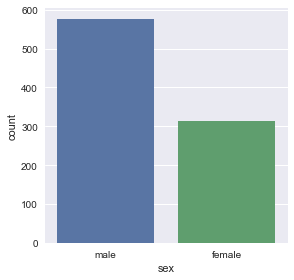

In [14]:
sns.factorplot("sex", data=titanic,kind="count", order=["male", "female"]);

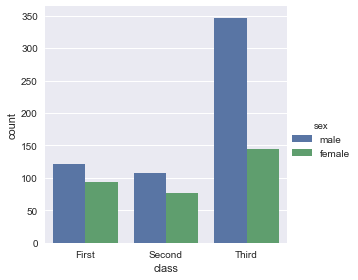

In [13]:
sns.factorplot("class", data=titanic, hue="sex", kind="count", order=["First", "Second", "Third"])

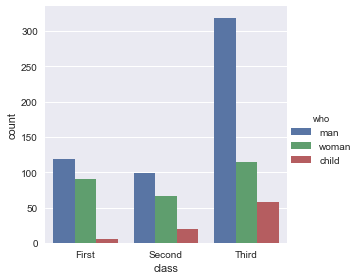

In [23]:
sns.factorplot("class", data=titanic, hue="who", kind="count", order=["First", "Second", "Third"]);

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


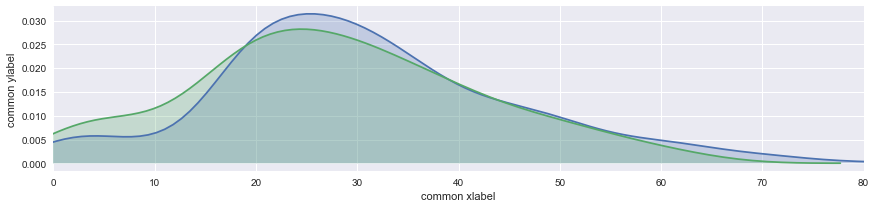

In [37]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=4)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlabel='', ylabel='Age')
fg.set(xlim=(0, 80)) #set the age on the x axis to 0 - 80

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


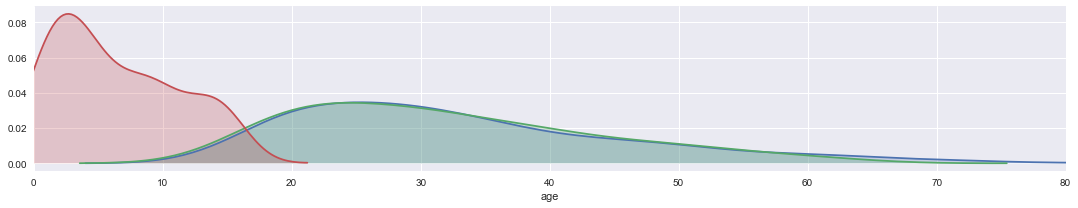

In [43]:
fg = sns.FacetGrid(data=titanic, hue="who", aspect=5)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim= (0,80))